<a href="https://colab.research.google.com/github/Rabiya-k/FicZon-Sales-Data-Analysis/blob/main/FicZon_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FicZon Inc is an IT solution provider with products ranging from onpremises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website.  FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales.  Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation. FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

**PROJECTGOAL:**
1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low Potential)

In [126]:
#Install mysql connector

!pip install mysql-connector

In [127]:
!pip install xgboost

### Importing Required Libraries and Reading the Data

In [128]:
#import required libraries

import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

import warnings
warnings.filterwarnings("ignore")

In [129]:
#create a connection to the database

connection = mysql.connector.connect(host = '18.136.157.135',user = 'dm_team2',password = 'DM!$Team&27@9!20!')
print(connection)

In [130]:
#Show the tables in the database

cursor = connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [131]:
#create a connection to the table " project_sales"

connection = mysql.connector.connect(host = '18.136.157.135',user = 'dm_team2',password = 'DM!$Team&27@9!20!', database = 'project_sales')
print(connection)

In [132]:
#Read the data

db_tables = pd.read_sql_query('show tables', connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [133]:
#Loading all columns of data

query = "select * from data"
sales_data = pd.read_sql(query, connection)
data = sales_data

In [134]:
#Show 1st 10 columns

data.head(10)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
5,14-11-2018 07:33,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
6,14-11-2018 05:58,,Website,XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
7,14-11-2018 05:49,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
8,14-11-2018 05:40,,Website,078XXXXXXX,DXXXXXXXheblue.com,Sales-Agent-10,,Mode-5,Open
9,14-11-2018 05:06,,Website,XXXXXXX,jXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [135]:
#show last 10 columns

data.tail(10)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7412,28-04-2018 11:25,18,Just Dial,,cXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Long Term
7413,28-04-2018 11:25,18,Live Chat-Direct,,kXXXXXXX@gmail.com,Sales-Agent-2,Delhi,Mode-1,LOST
7414,28-04-2018 11:16,19,Call,,rXXXXXXXotmail.com,Sales-Agent-9,Mumbai,Mode-1,In Progress Positive
7415,28-04-2018 10:50,21,Live Chat-Direct,,aXXXXXXX@gmail.com,Sales-Agent-4,Bangalore,Mode-1,In Progress Negative
7416,28-04-2018 10:00,19,Live Chat-Direct,,uXXXXXXX@gmail.com,Sales-Agent-9,Other Locations,Mode-3,Junk Lead
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


### Basic Check

In [136]:
data.shape

(7422, 9)

In this data have 9 columns and 7422 rows

In [137]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


## Exploratory Data Analysis

In [139]:
# Checking whether the dataset contains duplicate rows
data.duplicated().sum()

np.int64(2)

In [140]:
#Remove duplicates

data.drop_duplicates(inplace=True)

In [141]:
data.duplicated().sum()

np.int64(0)

In [142]:
data.shape

(7420, 9)

In [143]:
#Removing unwanted features

data.drop(['Created','Mobile','EMAIL'],axis=1,inplace=True)

In [144]:
#Set the status as "High Potential" and "Low Potential"

data.Status.replace(["CONVERTED","converted","In Progress Positive","Potential","Long Term","Open"], "High potential", inplace=True)
data.Status.replace(["LOST","In Progress Negative","Not Responding","Junk Lead","Just Enquiry"], "Low potential", inplace=True)

In [145]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,High potential
1,,Website,Sales-Agent-10,,Mode-5,High potential
2,,Website,Sales-Agent-10,,Mode-5,High potential
3,,Website,Sales-Agent-10,,Mode-5,High potential
4,,Website,Sales-Agent-10,,Mode-5,High potential


In [146]:
#Statistical measurement

data.describe()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
count,7420,7420,7420,7420,7420,7420
unique,30,26,13,18,5,2
top,18,Call,Sales-Agent-4,Other Locations,Mode-5,Low potential
freq,1711,2547,1500,2500,2973,4491


In [147]:
#Checking missing values

data.isnull().sum()

,0
Product_ID,0
Source,0
Sales_Agent,0
Location,0
Delivery_Mode,0
Status,0


### Univariate Analysis

In [148]:
#Analysing Product_ID column

data.Product_ID.value_counts()

,count
Product_ID,
18,1711
15,1518
19,1189
9,992
27,739
5,487
10,168
1,105
20,102


In [149]:
#Checking unique datas in Product_ID

data.Product_ID.unique()

array(['', '9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20',
       '11', '21', '1', '12', '13', '17', '24', '26', '16', '23', '22',
       '8', '14', '6', '0', '28', '7', '4'], dtype=object)

In [150]:
# find out the mode of product_ID column

data['Product_ID'].mode()

,Product_ID
0,18


In [151]:
#Replace the unnamed product_ID with mode '18'

data.Product_ID.replace('', '18', inplace= True)

In [152]:
#Checking unique datas in Product_ID after replacing with mode

data.Product_ID.unique()

array(['18', '9', '19', '15', '27', '5', '2', '3', '25', '10', '20', '11',
       '21', '1', '12', '13', '17', '24', '26', '16', '23', '22', '8',
       '14', '6', '0', '28', '7', '4'], dtype=object)

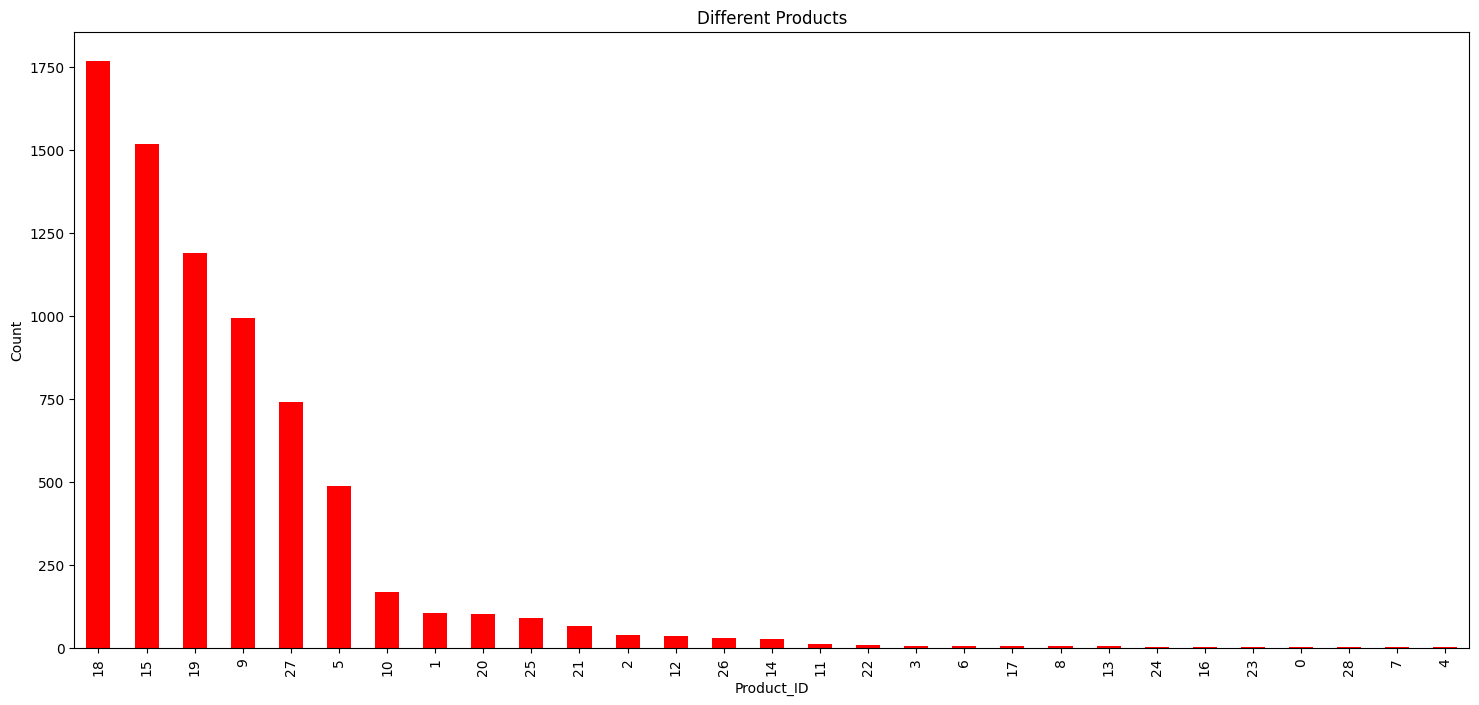

In [153]:
#vizualizing the Product_ID
plt.figure(figsize = (18,8))
data['Product_ID'].value_counts().plot.bar(color = 'red')
plt.title('Different Products')
plt.ylabel('Count')
plt.show()

OBSERVATION:

*   The product with the highest number is '18', its count is 1711
*   The product with the lowest number is '4'

In [154]:
#Analysing Source column

data.Source.value_counts()

,count
Source,
Call,2547
Live Chat-Direct,1834
Website,1592
Live Chat-Google Organic,274
Live Chat -PPC,249
Live Chat-Blog,237
Customer Referral,180
US Website,137
Just Dial,56


In [155]:
#Checking unique datas in Source column

data.Source.unique()

array(['Website', '', 'Live Chat-Google Organic', 'Call',
       'Live Chat-Direct', 'By Recommendation', 'Customer Referral',
       'Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [156]:
#we can group similar Sources

data.Source.replace(['Live Chat-Google Organic','Live Chat-Direct','Live Chat-Blog','Live Chat -PPC','Live Chat-Google Ads',
  'Live Chat-Adwords Remarketing','Live Chat-CPC','Live Chat-Quora','Live Chat-Youtube','Live Chat-Justdial'], "Live Chat", inplace=True)
data.Source.replace(['Website','US Website'], 'Website', inplace = True)
data.Source.replace(['Campaign','E-mail Campaign','SMS Campaign'], 'Campaign', inplace = True)
data.Source.replace(['Existing Customer', 'Existing Client'], 'Existing client/customer', inplace = True)
data.Source.replace(['Customer Referral', 'By Recommendation'], 'Customer Referral', inplace = True)

In [157]:
#Find out mode of source column

data.Source.mode()

,Source
0,Live Chat


In [158]:
#Replace unnamed data with mode 'call'

data.Source.replace('', 'Live Chat', inplace= True)

In [159]:
#Checking unique datas in Source after replacing with mode

data.Source.unique()

array(['Website', 'Live Chat', 'Call', 'Customer Referral',
       'E-Mail Message', 'Existing client/customer', 'Just Dial',
       'Campaign', 'Other', 'CRM form', 'Personal Contact'], dtype=object)

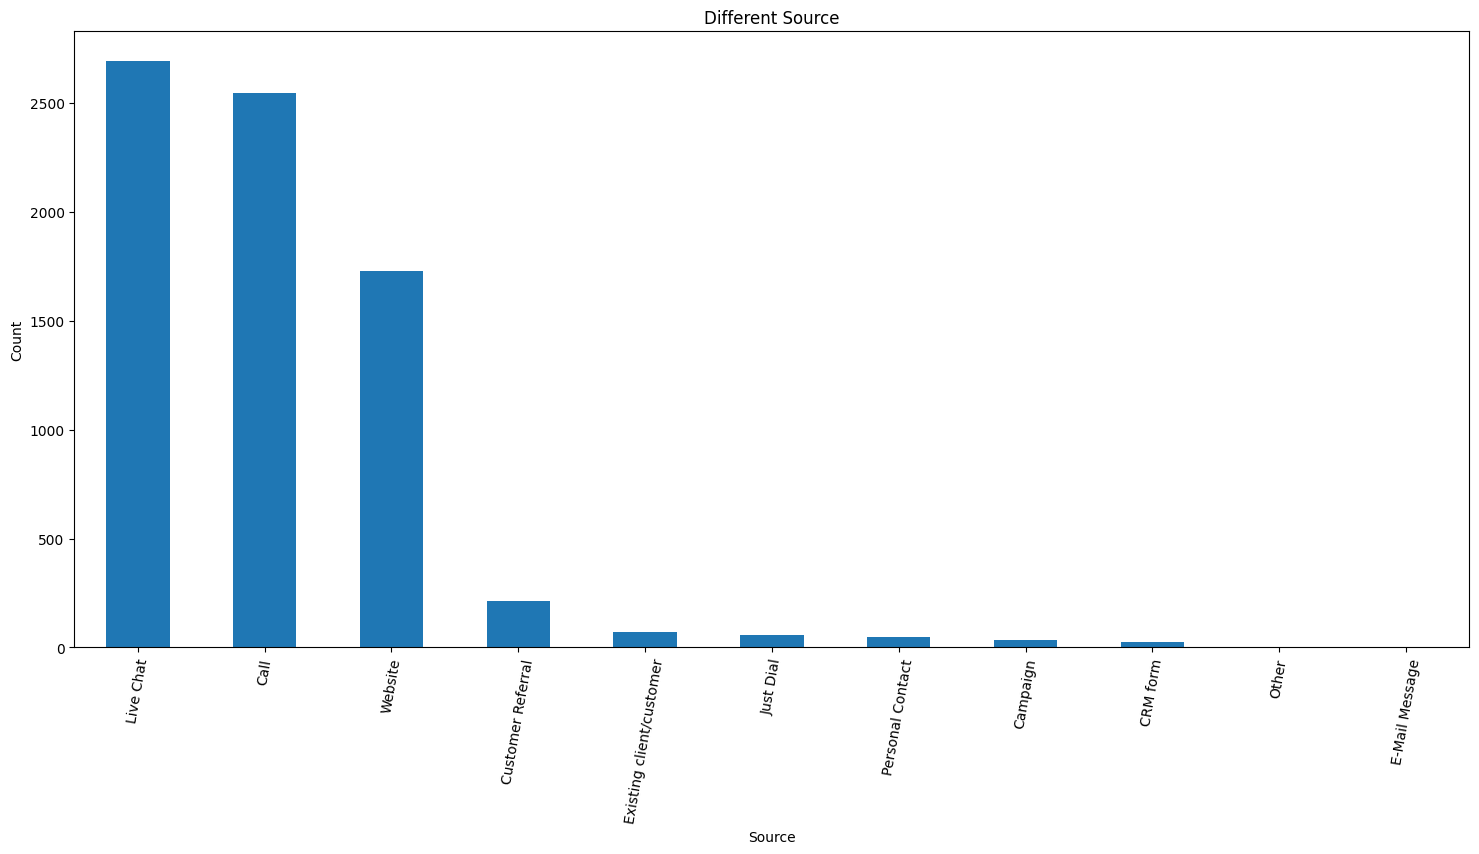

In [160]:
#vizualizing the Source

plt.figure(figsize = (18,8))
data['Source'].value_counts().plot.bar()
plt.title('Different Source')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

OBSERVATION:

*  The most used source is Live Chat
*  the least used source is E-Mail Message

In [161]:
#Analysing Sales_Agent column

data.Sales_Agent.value_counts()

,count
Sales_Agent,
Sales-Agent-4,1500
Sales-Agent-11,1420
Sales-Agent-5,1190
Sales-Agent-9,879
Sales-Agent-3,781
Sales-Agent-7,736
Sales-Agent-2,389
Sales-Agent-12,269
Sales-Agent-6,114


In [162]:
# Checking unique datas in Sales_Agent

data.Sales_Agent.unique()

array(['Sales-Agent-11', 'Sales-Agent-10', 'Sales-Agent-3',
       'Sales-Agent-4', 'Sales-Agent-9', 'Sales-Agent-7', '',
       'Sales-Agent-8', 'Sales-Agent-5', 'Sales-Agent-2',
       'Sales-Agent-12', 'Sales-Agent-1', 'Sales-Agent-6'], dtype=object)

In [163]:
#Find out mode of Sales_Agent

data.Sales_Agent.mode()

,Sales_Agent
0,Sales-Agent-4


In [164]:
#Replace unnamed data with mode 'Sales_Agent'

data.Sales_Agent.replace('', 'Sales_Agent_4', inplace= True)

In [165]:
#hecking unique datas in Sales_Agent after replacing with mode

data.Sales_Agent.unique()

array(['Sales-Agent-11', 'Sales-Agent-10', 'Sales-Agent-3',
       'Sales-Agent-4', 'Sales-Agent-9', 'Sales-Agent-7', 'Sales_Agent_4',
       'Sales-Agent-8', 'Sales-Agent-5', 'Sales-Agent-2',
       'Sales-Agent-12', 'Sales-Agent-1', 'Sales-Agent-6'], dtype=object)

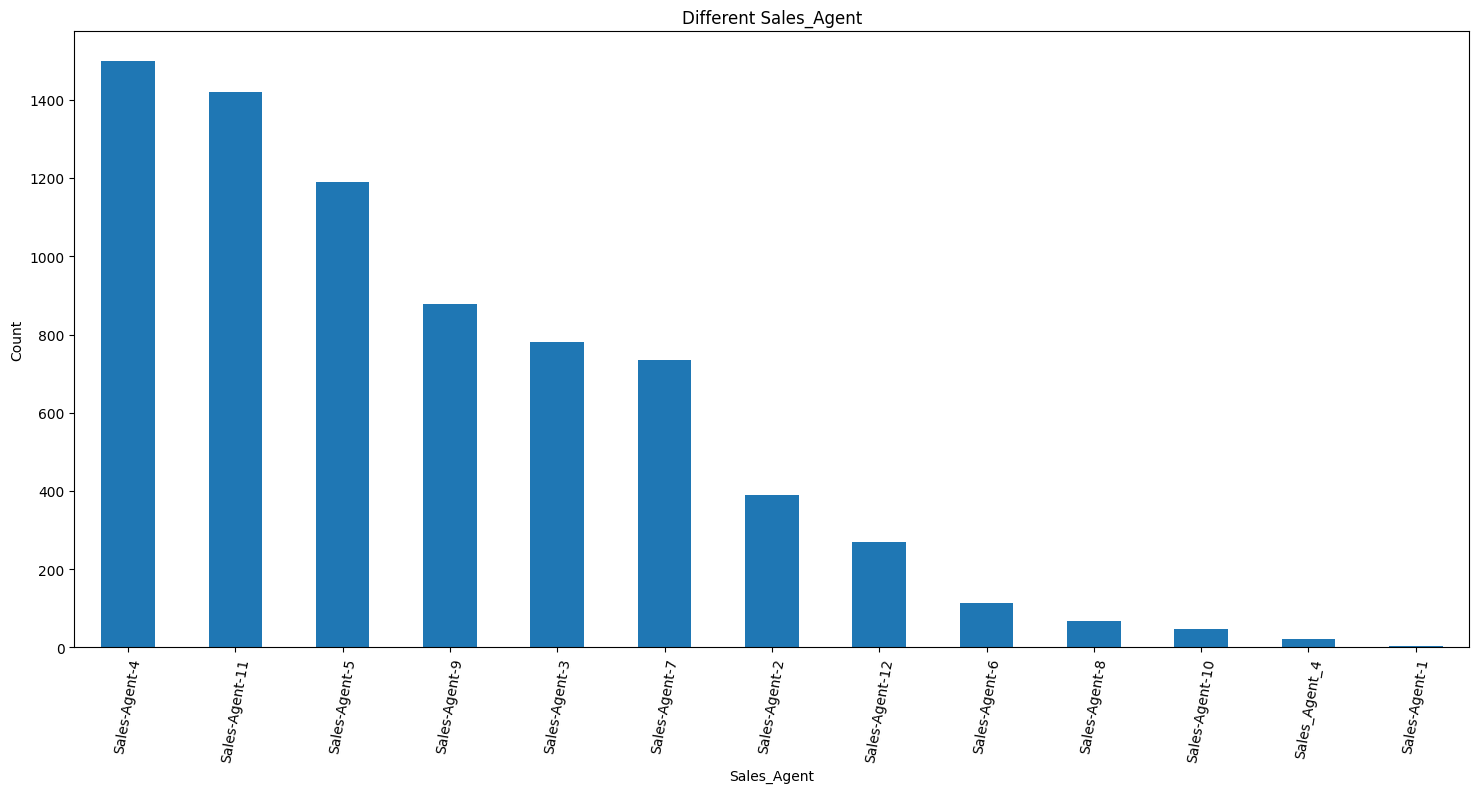

In [166]:
#Vizualizing the Sales_Agent

plt.figure(figsize = (18,8))
data['Sales_Agent'].value_counts().plot.bar()
plt.title('Different Sales_Agent')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

OBSERVATION:
*  Sales-Agent-4 tried to connect with the more customers, its count is 1500
*  sales -agent-1 tried to connect with the less customers



In [167]:
#Analysing Location column

data.Location.value_counts()

,count
Location,
Other Locations,2500
Bangalore,2084
Chennai,909
Hyderabad,528
Delhi,471
Mumbai,402
Pune,142
UAE,79
Trivandrum,58


In [168]:
#Checking Unique datas in Location

data.Location.unique()

array(['', 'Bangalore', 'Other Locations', 'UAE', 'Trivandrum',
       'Hyderabad', 'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [169]:
#Find out the mode of Location

data.Location.mode()

,Location
0,Other Locations


In [170]:
#Replace 'UAE','UK','USA','Singapore','AUSTRALIA','EUROPE','Malaysia' these counties as Foreign Country

data.Location.replace(['UAE','UK','USA','Singapore','AUSTRALIA','EUROPE','Malaysia'], 'Foreign Country', inplace= True)

In [171]:
#Replace unnamed datas with mode 'Other Location'

data.Location.replace('', 'Other Locations', inplace= True)

#Replace 'Howrah' as 'Kolkata', Howrah is a place in Kolkata city

data.Location.replace('Howrah', 'Kolkata', inplace= True)

In [172]:
#Checking unique datas in Location after replacing

data.Location.unique()

array(['Other Locations', 'Bangalore', 'Foreign Country', 'Trivandrum',
       'Hyderabad', 'Chennai', 'Delhi', 'Mumbai', 'Kolkata', 'Pune'],
      dtype=object)

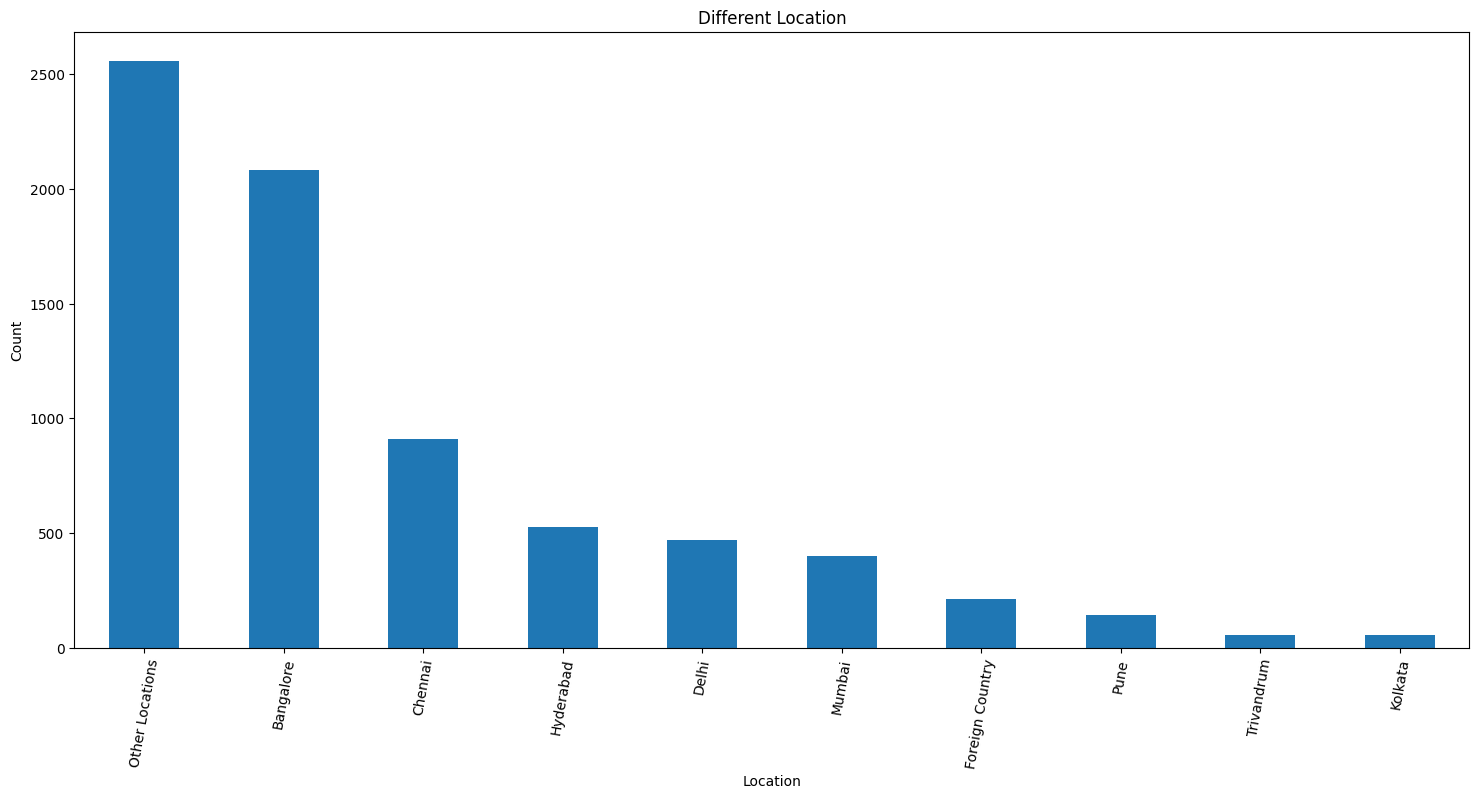

In [173]:
#Vizualization of Location

plt.figure(figsize = (18,8))
data['Location'].value_counts().plot.bar()
plt.title('Different Location')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

OBSERVATION:

*   Most of the customers located in Banglore, its number is 2084

In [174]:
#Analysing Delivery_Mode column

data.Delivery_Mode.value_counts()

,count
Delivery_Mode,
Mode-5,2973
Mode-1,2627
Mode-3,1688
Mode-4,121
Mode-2,11


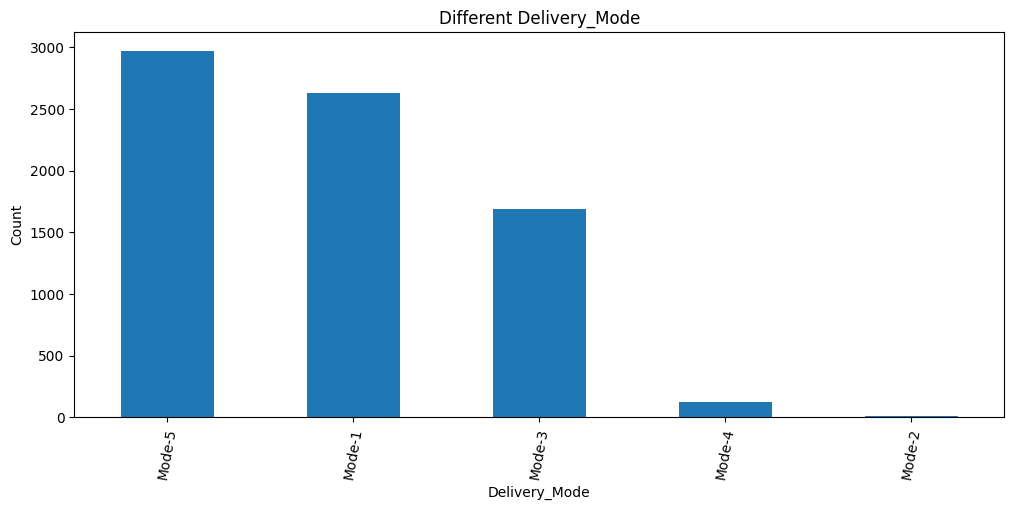

In [175]:
#Vizualizing Delivery Mode

plt.figure(figsize = (12,5))
data['Delivery_Mode'].value_counts().plot.bar()
plt.title('Different Delivery_Mode')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

OBSERVATION:

*   Most of the people chose the mode-5 delivery mode, its count is 2973
*   Least number of people chose the mode-2 delivery mode



In [176]:
#Analysing Status column

data.Status.value_counts()

,count
Status,
Low potential,4491
High potential,2929


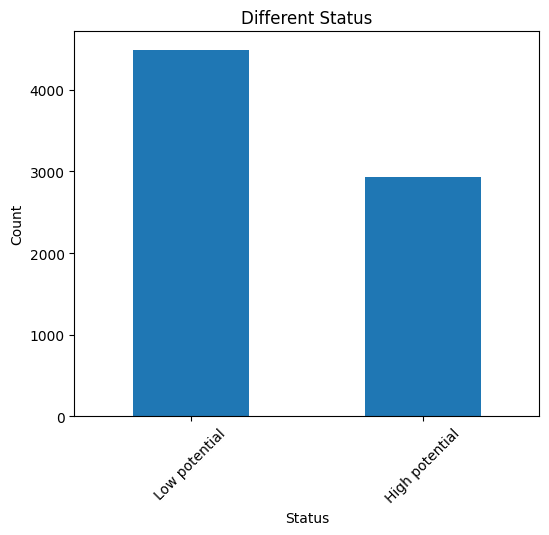

In [177]:
#Vizualization of Status

plt.figure(figsize = (6,5))
data['Status'].value_counts().plot.bar()
plt.title('Different Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

OBSERVATION:

*   Most of the products status is low potential

In [178]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18,Website,Sales-Agent-11,Other Locations,Mode-5,High potential
1,18,Website,Sales-Agent-10,Other Locations,Mode-5,High potential
2,18,Website,Sales-Agent-10,Other Locations,Mode-5,High potential
3,18,Website,Sales-Agent-10,Other Locations,Mode-5,High potential
4,18,Website,Sales-Agent-10,Other Locations,Mode-5,High potential


### Bivariate Analysis

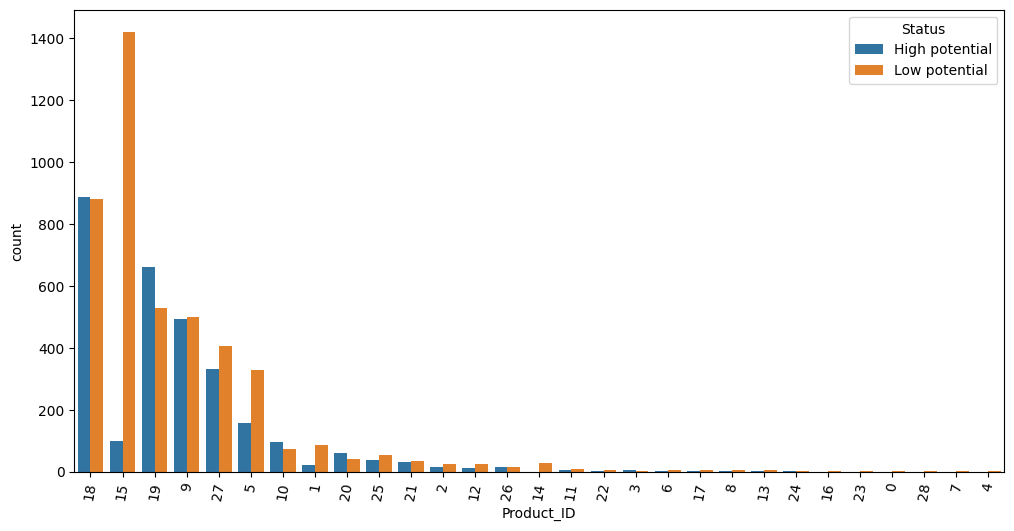

In [179]:
#Vizualization of Product_ID based on Status

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Product_ID', hue='Status', order=data['Product_ID'].value_counts().index)
plt.xticks(rotation=80)
plt.show()

OBSERVATION:

* The most high potential product is '18'   
* The most low potential product is '15'

<Axes: xlabel='Product_ID'>

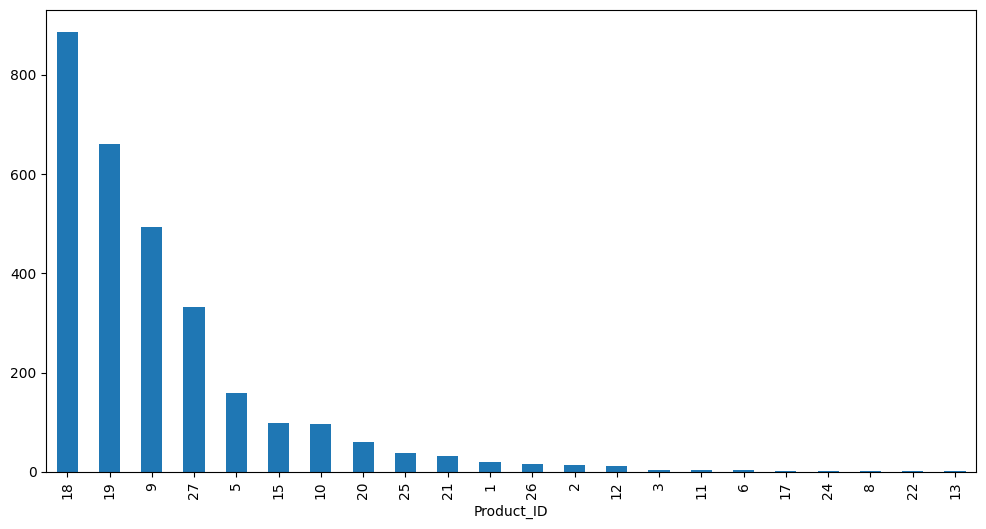

In [180]:
#Vizualization of Product_ID based on High_Potential

High_Potential_product=data[data['Status']=='High potential']['Product_ID'].value_counts()
High_Potential_product.plot(kind='bar',figsize=(12,6))

<Axes: xlabel='Product_ID'>

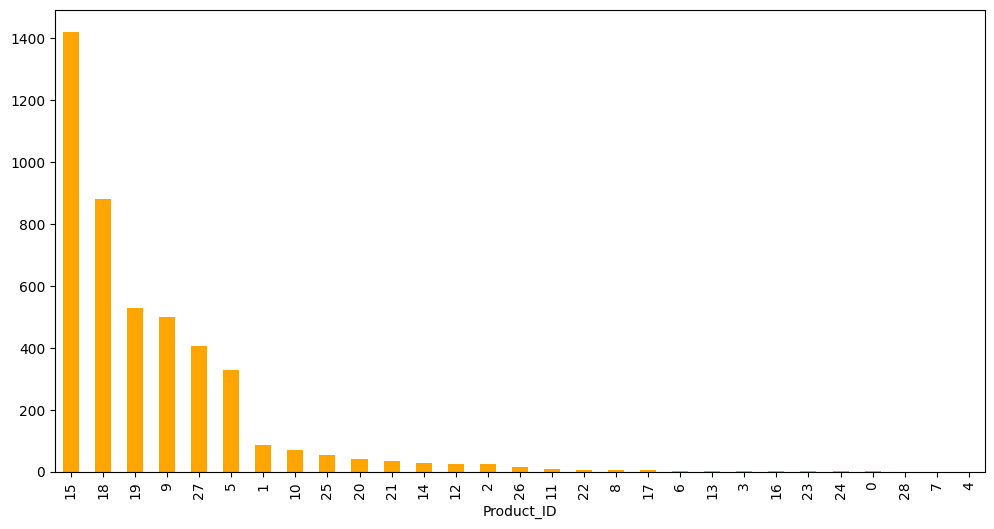

In [181]:
#Vizualization of Product_ID based on Low_Potential

Low_Potential_product=data[data['Status']=='Low potential']['Product_ID'].value_counts()
Low_Potential_product.plot(kind='bar',figsize=(12,6), color = 'orange')

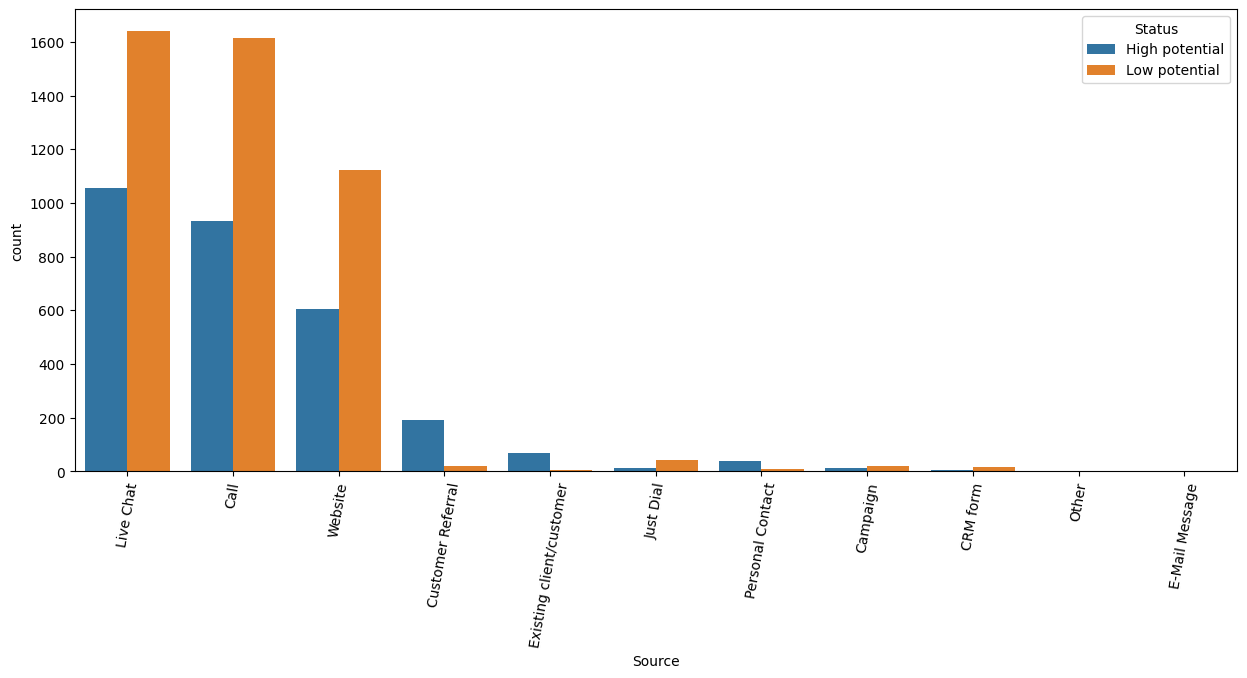

In [182]:
#Vizualization of Source based on Status

plt.figure(figsize=(15,6))
sns.countplot(data=data, x='Source', hue='Status', order=data['Source'].value_counts().index)
plt.xticks(rotation=80)
plt.show()

OBSERVATION:

* Live Chat, Call and Website these 3 are most high potential and low potentiol sorces  



<Axes: xlabel='Source'>

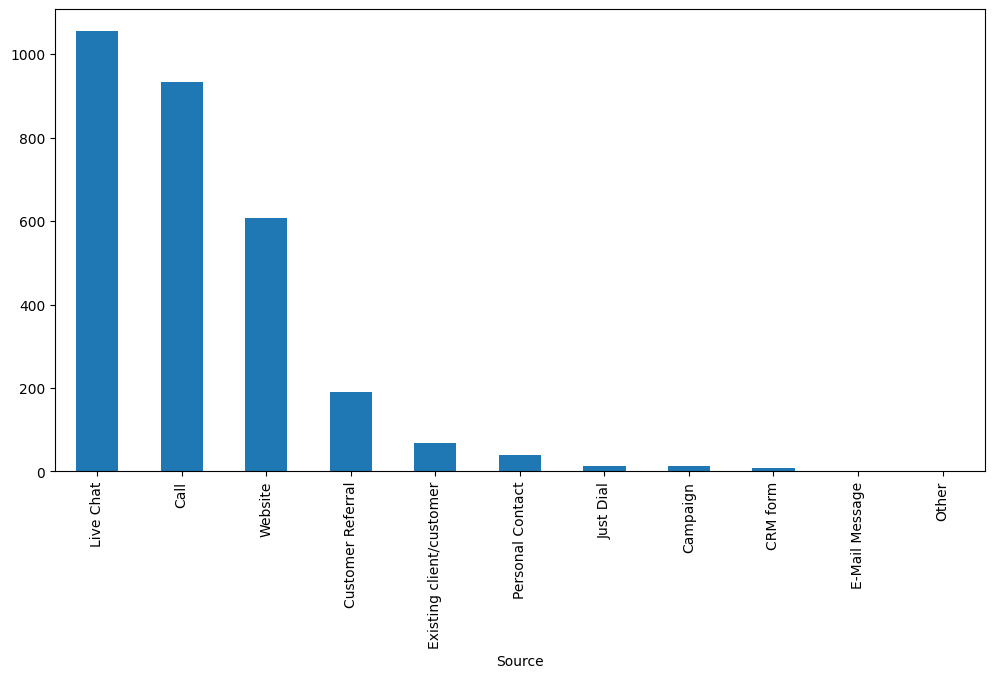

In [183]:
#Vizualization of Source based on High_Potential

High_Potential_Source=data[data['Status']=='High potential']['Source'].value_counts()
High_Potential_Source.plot(kind='bar',figsize=(12,6))

<Axes: xlabel='Source'>

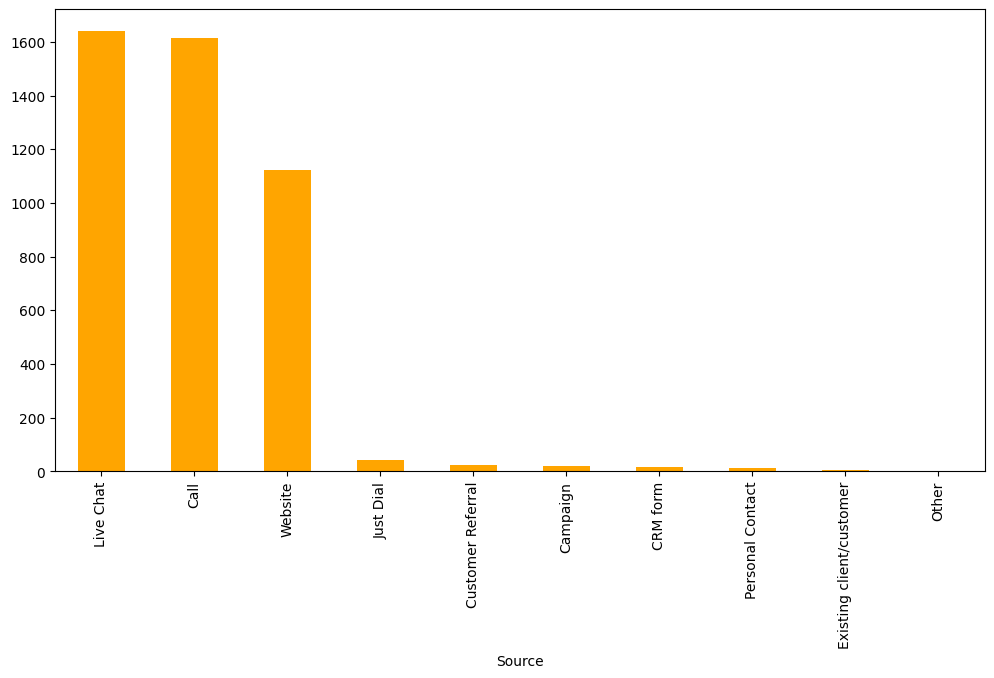

In [184]:
#Vizualization of Source based on Low_Potential

Low_Potential_Source=data[data['Status']=='Low potential']['Source'].value_counts()
Low_Potential_Source.plot(kind='bar',figsize=(12,6), color = 'orange')

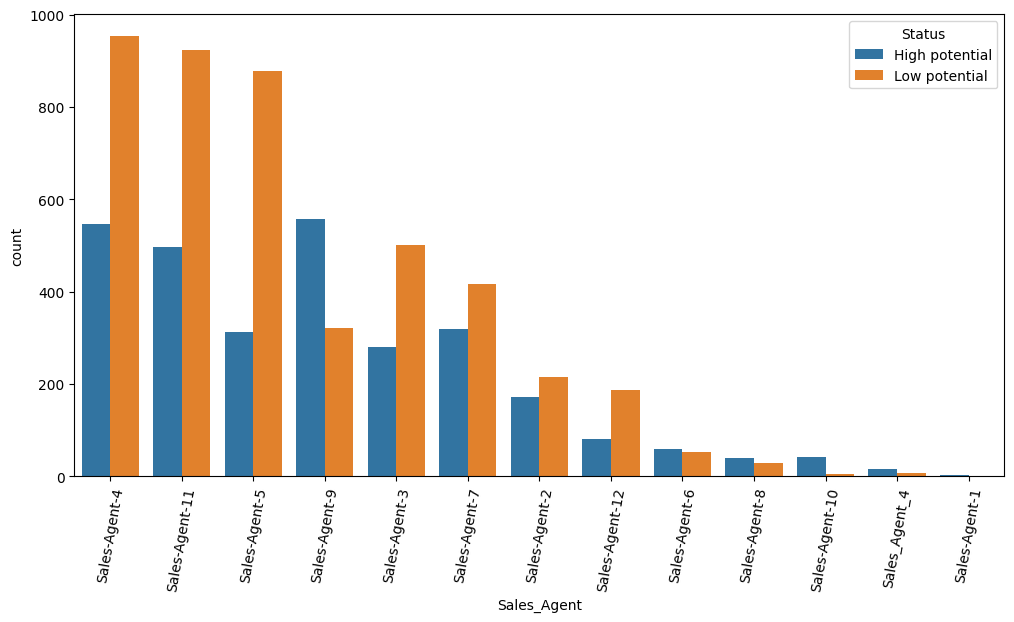

In [185]:
#Vizualization of Sales Agent based on Status

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Sales_Agent', hue='Status', order=data['Sales_Agent'].value_counts().index)
plt.xticks(rotation=80)
plt.show()

OBSERVATION:

*   The Most High Potential Sales_Agent is Sales_Agent-9
*   The Most Low Potential Sales_Agent is Sales_Agent-4

<Axes: xlabel='Sales_Agent'>

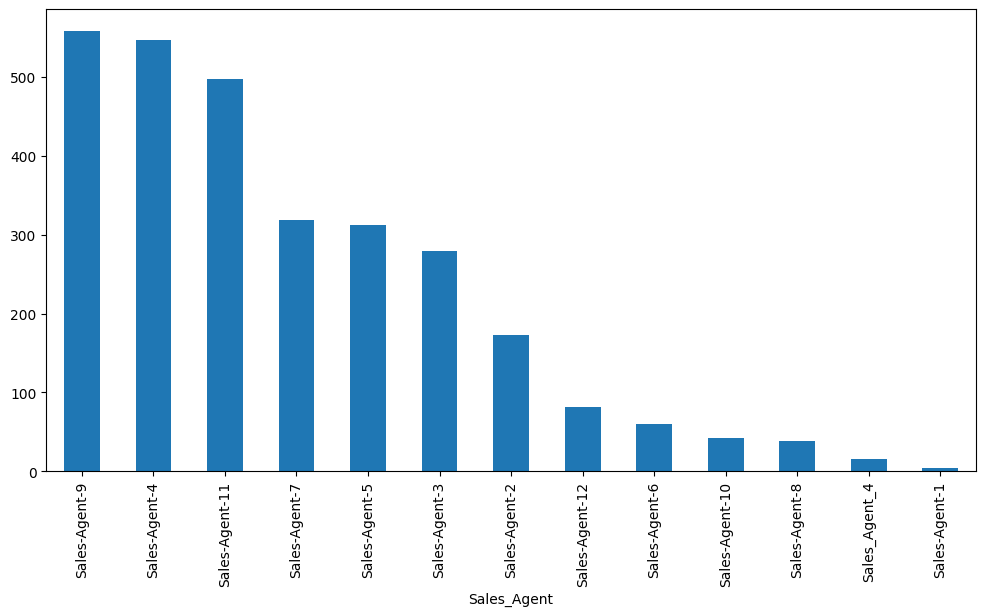

In [186]:
#Vizualization of Sales Agent based on High_Potential

High_Potential_Sales_Agent=data[data['Status']=='High potential']['Sales_Agent'].value_counts()
High_Potential_Sales_Agent.plot(kind='bar',figsize=(12,6))

<Axes: xlabel='Sales_Agent'>

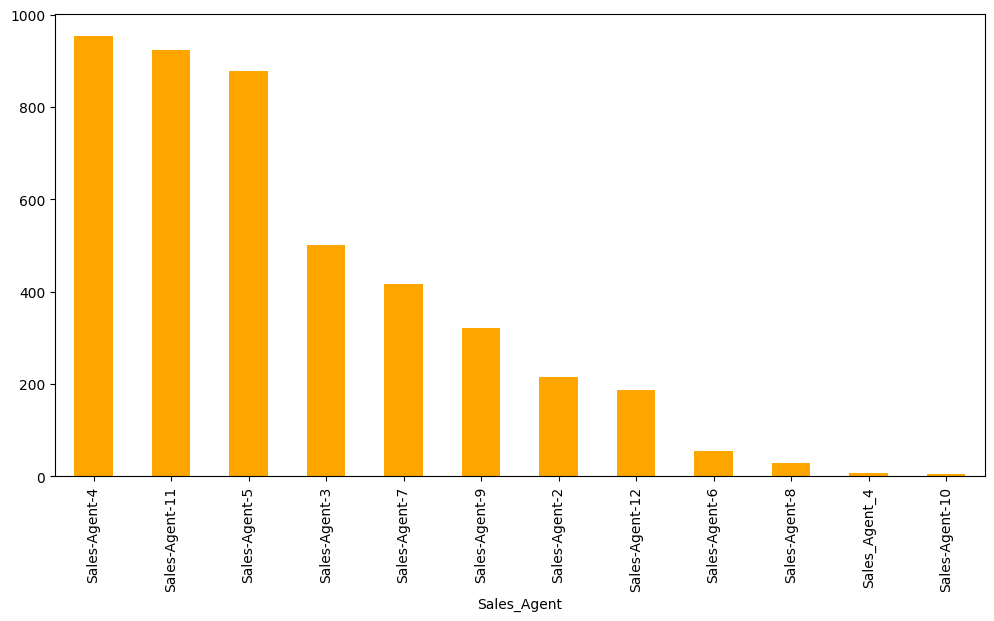

In [187]:
#Vizualization of Sales Agent based on Low_Potential

Low_Potential_Sales_Agent=data[data['Status']=='Low potential']['Sales_Agent'].value_counts()
Low_Potential_Sales_Agent.plot(kind='bar',figsize=(12,6), color= 'orange')

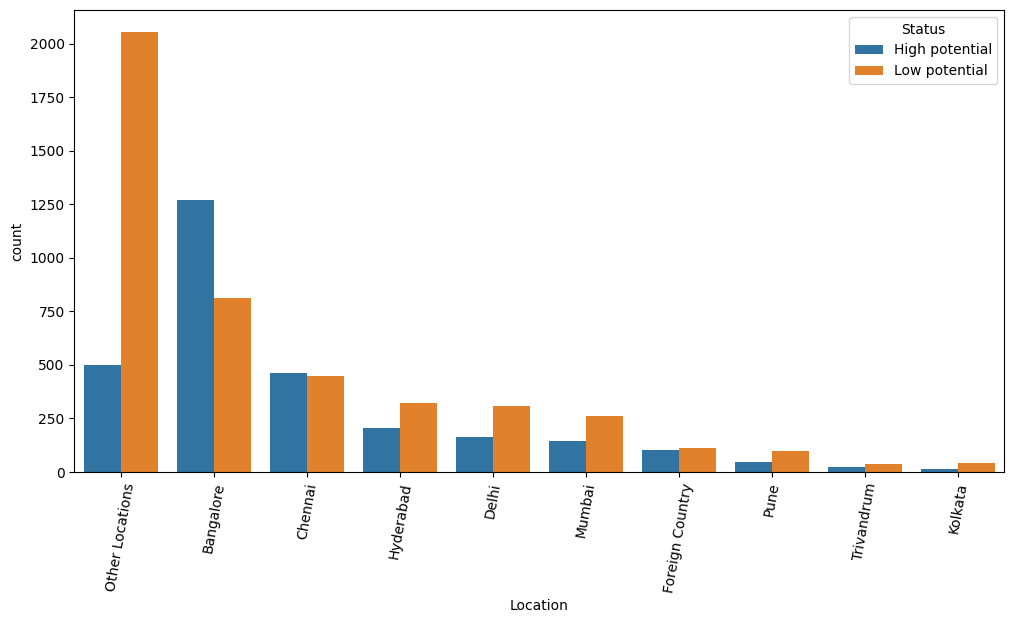

In [188]:
#Vizualization of Locations based on Status

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Location', hue='Status', order=data['Location'].value_counts().index)
plt.xticks(rotation=80)
plt.show()

OBSERVATION:

*   The Most High Potential Location is Bangalore



<Axes: xlabel='Location'>

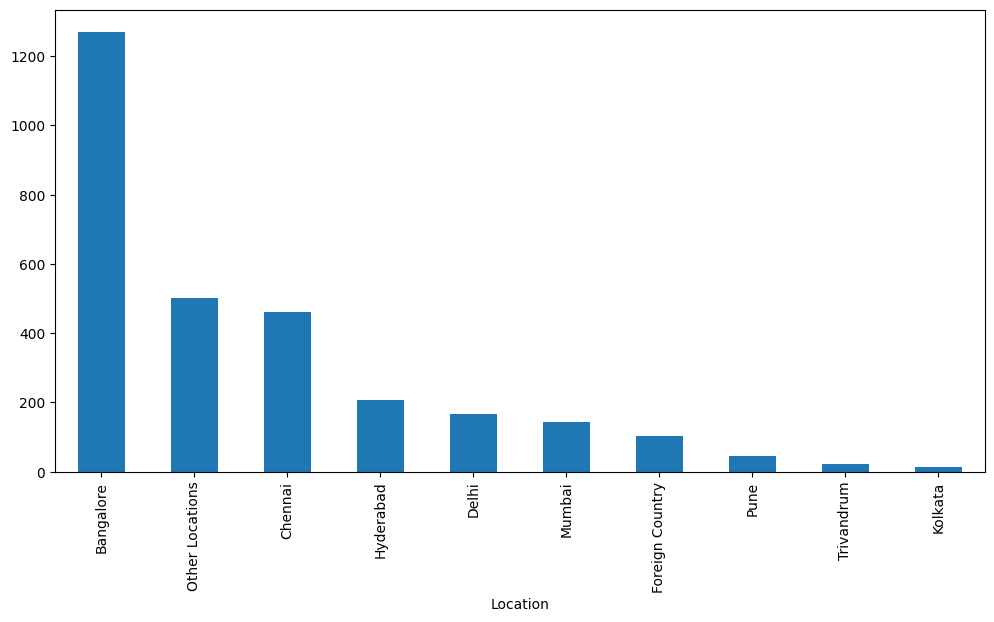

In [189]:
#Vizualization of Locations based on High_Potential

High_Potential_Location=data[data['Status']=='High potential']['Location'].value_counts()
High_Potential_Location.plot(kind='bar',figsize=(12,6))

<Axes: xlabel='Location'>

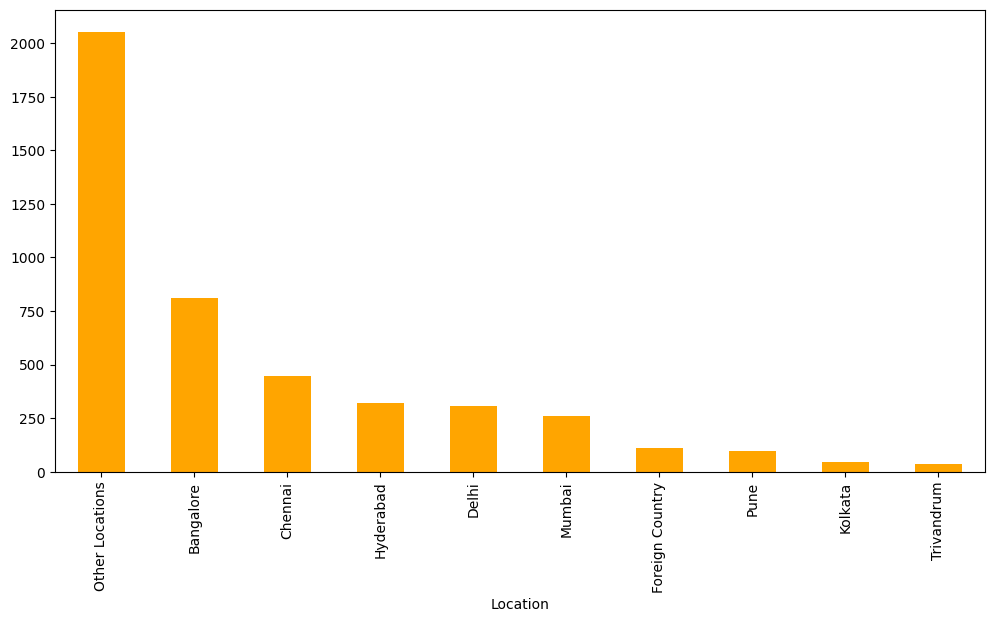

In [190]:
#Vizualization of Locations based on Low_Potential

Low_Potential_Location=data[data['Status']=='Low potential']['Location'].value_counts()
Low_Potential_Location.plot(kind='bar',figsize=(12,6), color = 'orange')

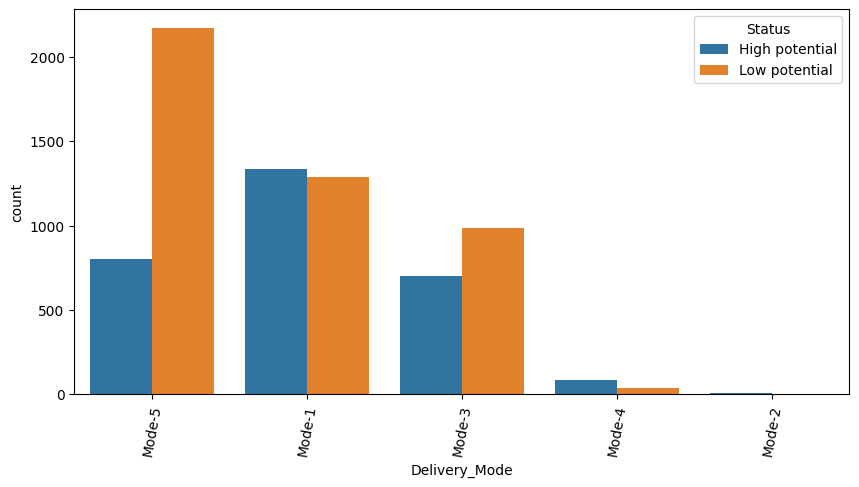

In [191]:
#Vizualization of Delivery Mode based on Status

plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Delivery_Mode', hue='Status', order=data['Delivery_Mode'].value_counts().index)
plt.xticks(rotation=80)
plt.show()

OBSERVATION:

*  The Most High Potential Delivery Mode is Mode-1

*  The Most Low Potential Delivery Mode is Mode-5

<Axes: xlabel='Delivery_Mode'>

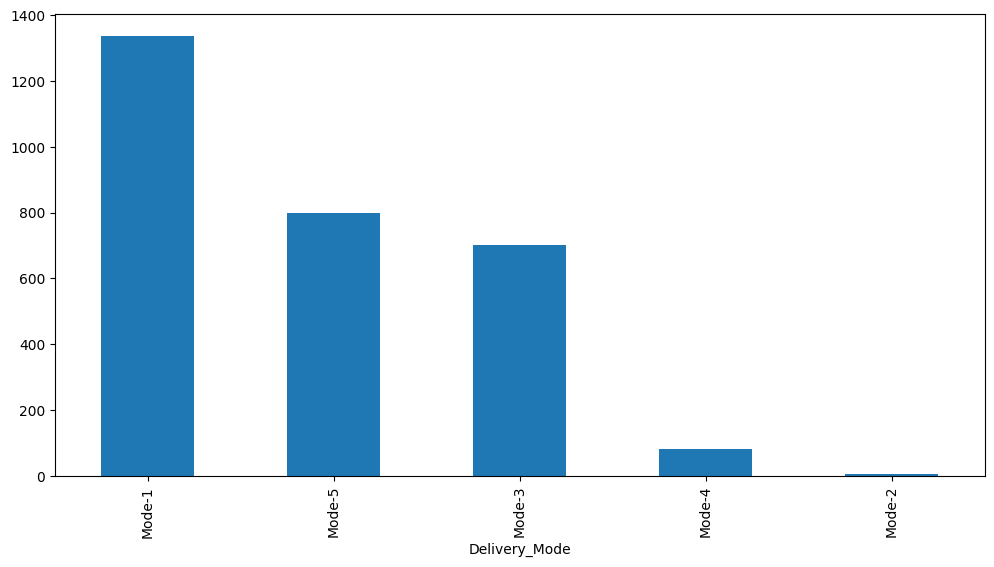

In [192]:
#Vizualization of Delivery Mode based on High_Potential

High_Potential_Delivery_Mode=data[data['Status']=='High potential']['Delivery_Mode'].value_counts()
High_Potential_Delivery_Mode.plot(kind='bar',figsize=(12,6))

<Axes: xlabel='Delivery_Mode'>

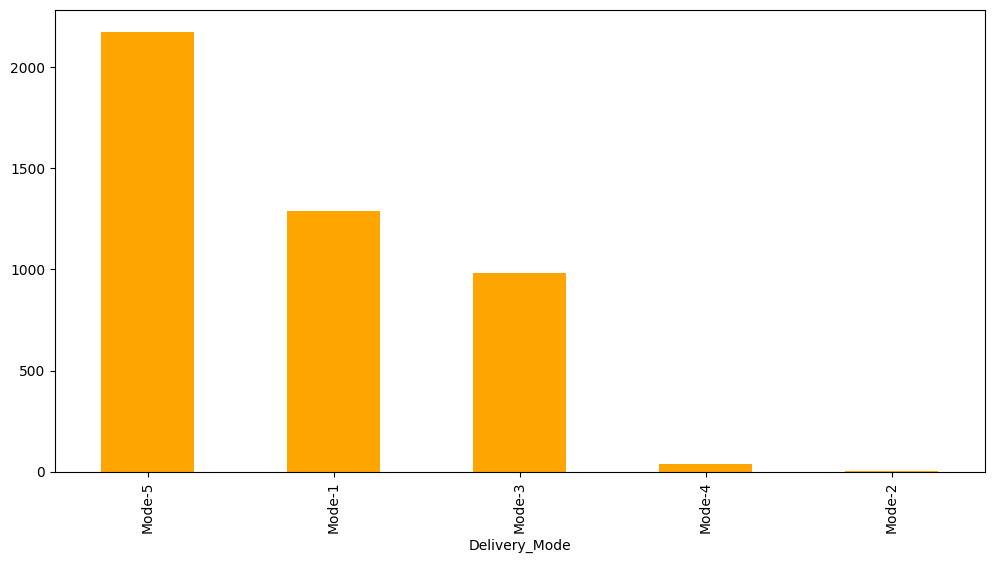

In [193]:
#Vizualization of Delivery Mode based on Low_Potential

Low_Potential_Delivery_Mode=data[data['Status']=='Low potential']['Delivery_Mode'].value_counts()
Low_Potential_Delivery_Mode.plot(kind='bar',figsize=(12,6), color = 'orange')

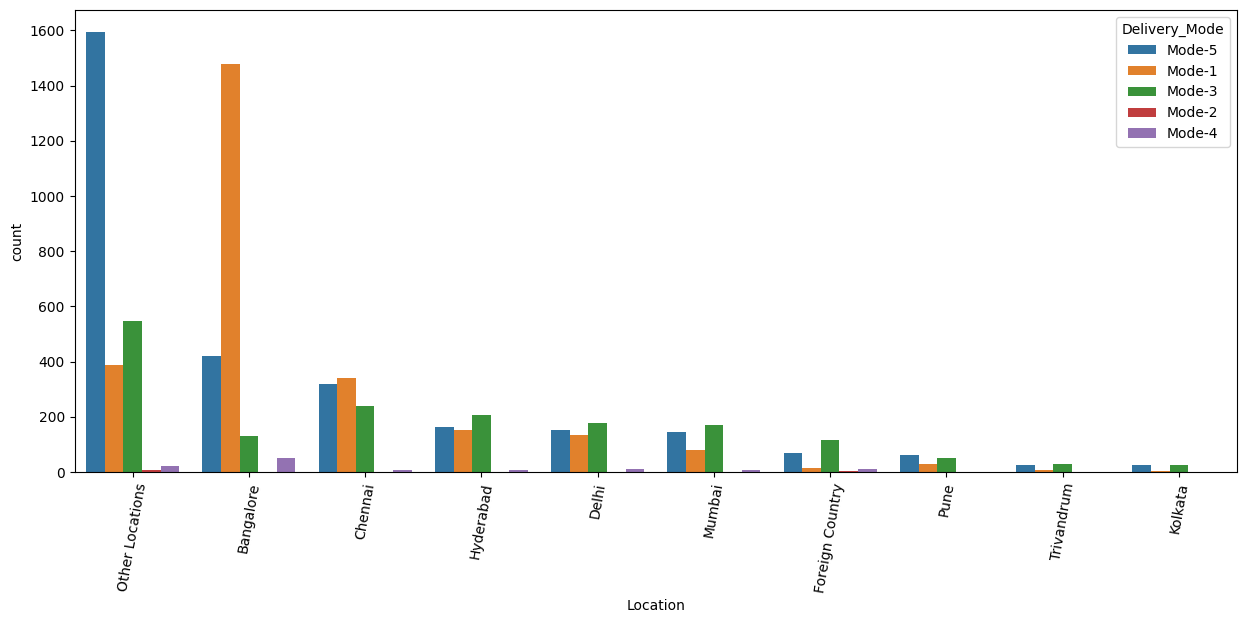

In [194]:
#Vizualization of Locations based on Delivery Mode

plt.figure(figsize=(15,6))
sns.countplot(data=data, x='Location', hue='Delivery_Mode', order=data['Location'].value_counts().index)
plt.xticks(rotation=80)
plt.show()

OBSERVATION:

* In Bangalore and Chennai most of the customers chose the Mode-1 delivery mode
* In Hydrabad, Delhi, Mumbai, UAE most of the customers chose the Mode-3 delivery mode



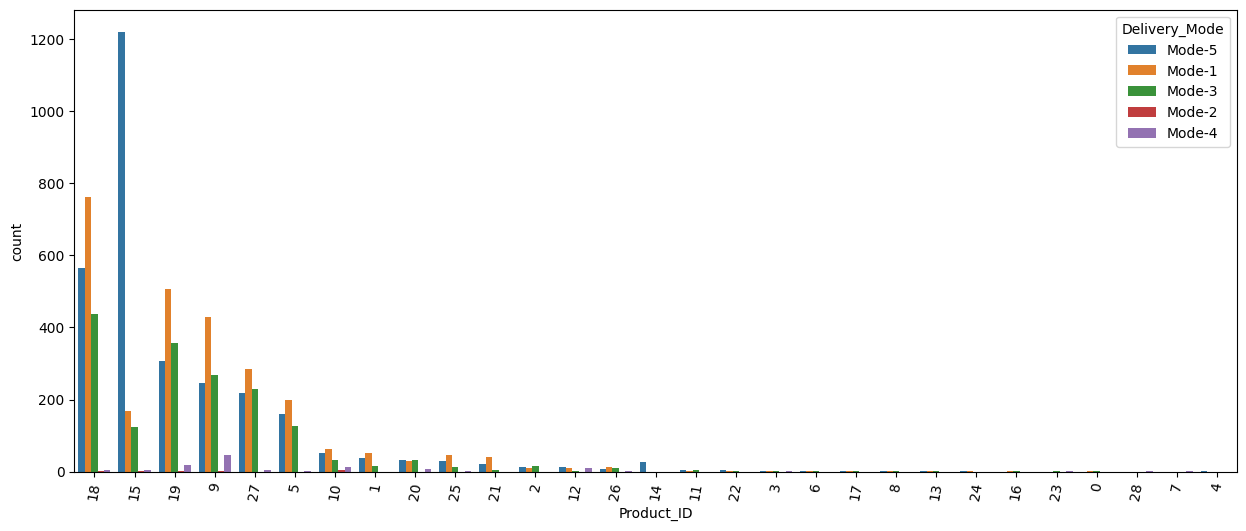

In [195]:
#Vizualization of Products based on Delivery Mode

plt.figure(figsize=(15,6))
sns.countplot(data=data, x='Product_ID', hue='Delivery_Mode', order=data['Product_ID'].value_counts().index)
plt.xticks(rotation=80)
plt.show()

OBSERVATION:

*  The products '18','19','9','27','5','10','1' are mostly delivered through Mode-1
*  The product '15' mostly delivered through Mode-5



### Cardinality

In [196]:
# Number of labels: cardinality
#Let's now check if our categorical variables have a huge number of categories.

for col in data:
    print(col, ' contains ', len(data[col].unique()), ' labels')

Product_ID  contains  29  labels
Source  contains  11  labels
Sales_Agent  contains  13  labels
Location  contains  10  labels
Delivery_Mode  contains  5  labels
Status  contains  2  labels


### Encoding categorical variables

In [197]:
# Label Encoding of Status
# High potential is assign with 1 because of majority and most freqent
# Low potentail is assign with 0 because of less no
data.Status = data.Status.map({'High potential':1,'Low potential':0})

In [198]:
data['Status'].value_counts()

,count
Status,
0,4491
1,2929


In [199]:
# Label Encoding of Product_ID, Source, Sales_Agent, Location, Delivery Mode

label_encoder = LabelEncoder()
data['Product_ID'] = label_encoder.fit_transform(data['Product_ID'])
data['Source'] = label_encoder.fit_transform(data['Source'])
data['Sales_Agent'] = label_encoder.fit_transform(data['Sales_Agent'])
data['Location'] = label_encoder.fit_transform(data['Location'])
data['Delivery_Mode'] = label_encoder.fit_transform(data['Delivery_Mode'])

In [200]:
data.head(50)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,10,10,2,7,4,1
1,10,10,1,7,4,1
2,10,10,1,7,4,1
3,10,10,1,7,4,1
4,10,10,1,7,4,1
5,10,10,1,7,4,1
6,10,10,1,7,4,1
7,10,10,1,7,4,1
8,10,10,1,7,4,1
9,10,10,1,7,4,1


### Handling Outliers

In [201]:
discrete = []
for col in data:
    if len(data[col].unique())<10:
        print(col, ' values: ', data[col].unique())
        discrete.append(col)

print('There are {} discrete variables'.format(len(discrete)))

Delivery_Mode  values:  [4 0 2 1 3]
Status  values:  [1 0]
There are 2 discrete variables


In [202]:
continuous = [col for col in data if col not in discrete]

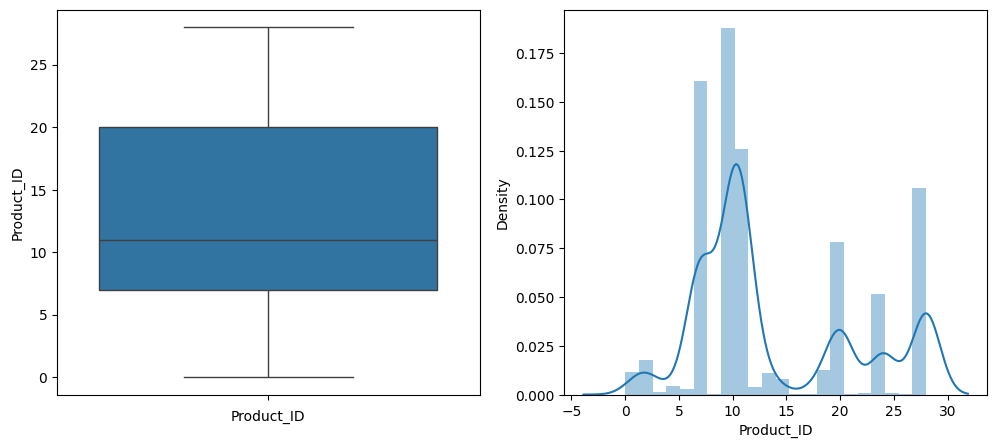

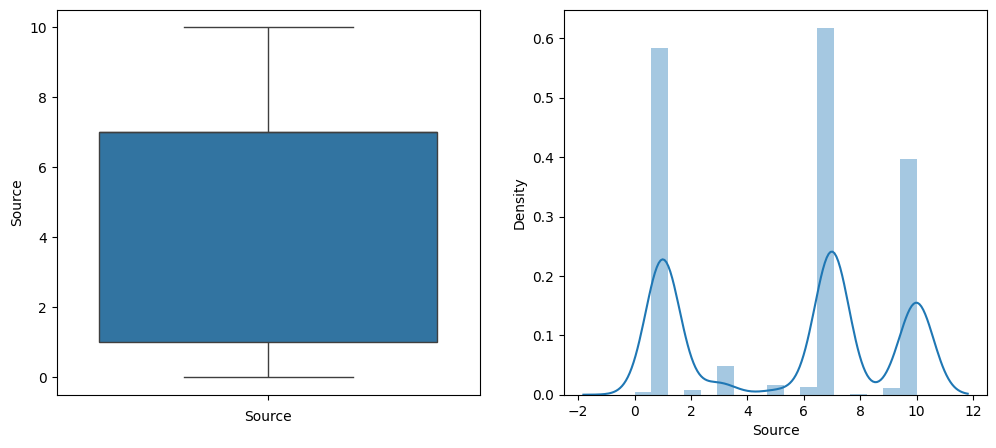

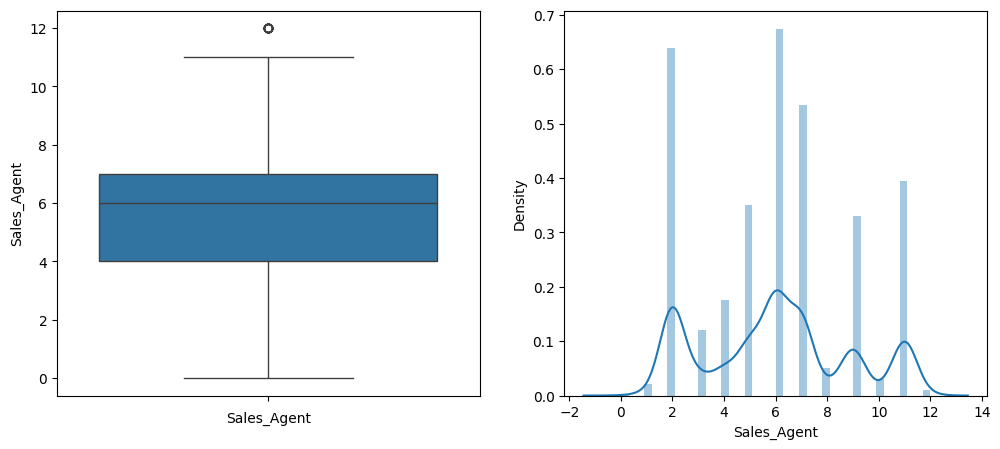

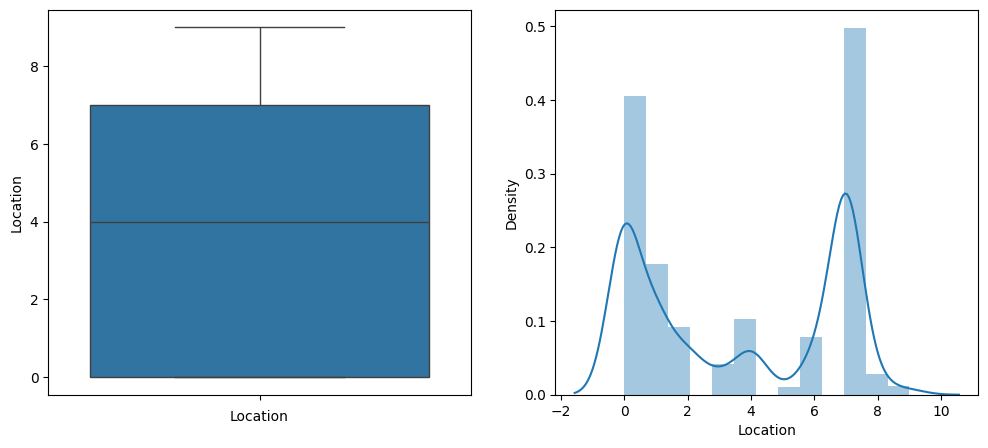

In [203]:
#Vizualizing Boxplot and Distplot of each columns

for col in continuous:
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y= data[col])
    fig.set_xlabel(col)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[col])
    fig.set_xlabel(col)
    plt.show()

Outliers can be visualised as the dots outside the whiskers in the boxplots.

In [204]:
#Capping the outlier rows with Percentiles
upper_lim = data['Sales_Agent'].quantile(.95)
data.loc[(data['Sales_Agent'] > upper_lim),'Sales_Agent'] = upper_lim

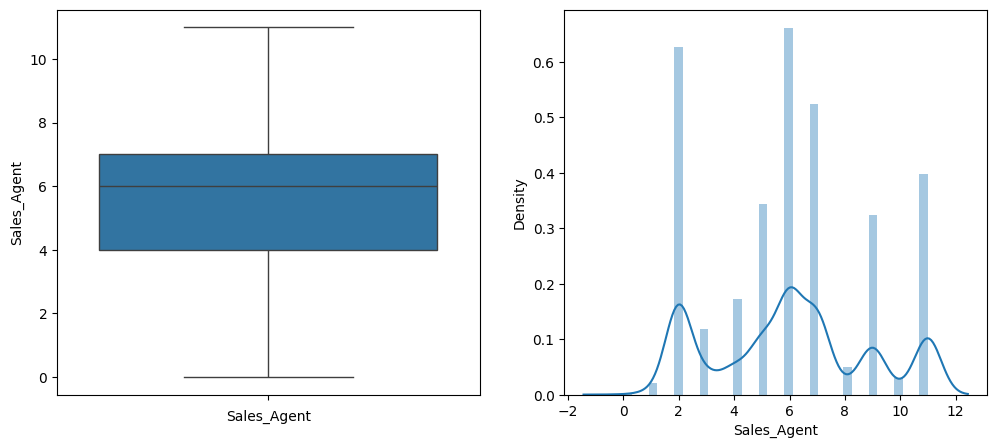

In [205]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=data['Sales_Agent'])
fig.set_xlabel('Sales_Agent')

plt.subplot(1, 2, 2)
fig = sns.distplot(data['Sales_Agent'].dropna())
fig.set_xlabel('Sales_Agent')

plt.show()

### Scaling

In [206]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [207]:
data = pd.DataFrame(data, columns=['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode','Status'])
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0.357143,1.0,0.181818,0.777778,1.0,1.0
1,0.357143,1.0,0.090909,0.777778,1.0,1.0
2,0.357143,1.0,0.090909,0.777778,1.0,1.0
3,0.357143,1.0,0.090909,0.777778,1.0,1.0
4,0.357143,1.0,0.090909,0.777778,1.0,1.0


## Model Training

In [208]:
# separating data into training and test

x = data.drop('Status', axis=1)
y = data['Status']

In [209]:
# Split the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state= 123)

In [210]:
# first, initialize the classificator
lg = LogisticRegression()
knn= KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
xboost= XGBClassifier()

In [211]:
# now, create a list with the models
models= [lg, knn, dt, rf, svc, xboost]

In [212]:
#Use for loop to train the different models

for model in models:
    model.fit(x_train, y_train) # fit the model
    y_pred= model.predict(x_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class

    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}",'\n')
    print(clf_report)
    print("Confusion Matrix" ,"\n" ,confusion_matrix(y_test,y_pred))
    print("\n")

The accuracy of model LogisticRegression is 0.68 

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       920
         1.0       0.59      0.53      0.56       564

    accuracy                           0.68      1484
   macro avg       0.66      0.65      0.65      1484
weighted avg       0.67      0.68      0.68      1484

Confusion Matrix 
 [[711 209]
 [267 297]]


The accuracy of model KNeighborsClassifier is 0.70 

              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       920
         1.0       0.61      0.59      0.60       564

    accuracy                           0.70      1484
   macro avg       0.68      0.68      0.68      1484
weighted avg       0.70      0.70      0.70      1484

Confusion Matrix 
 [[704 216]
 [229 335]]


The accuracy of model DecisionTreeClassifier is 0.71 

              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77 

### Implementing Cross-validated Logistic Regression

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [214]:
Lg = LogisticRegression()

In [215]:
scores = cross_validate(Lg,x_train, y_train, scoring = 'accuracy', cv = 10, return_train_score=True,return_estimator=True,verbose = 10)

[CV] START .....................................................................
[CV] END ..................., score=(train=0.668, test=0.643) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.668, test=0.635) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.668, test=0.648) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.663, test=0.692) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.663, test=0.689) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.668, test=0.653) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.1s


In [216]:
print(scores['test_score'])

[0.64309764 0.63468013 0.64814815 0.69191919 0.68855219 0.65319865
 0.6846543  0.63237774 0.69139966 0.69814503]


In [217]:
print(scores['test_score'].min(), scores['test_score'].mean(), scores['test_score'].max())

0.6323777403035413 0.6666172688095116 0.6981450252951096


So the range of our accuracy is between 0.63 to 0.7 but generally 0.67 on average.

### Implementing KNN for different k values

In [ ]:
#Try KNN for different k values from 1 t0 11

n_neighbors = range(1, 11)
test_accuracy = []

for n in n_neighbors:
  Knn = KNeighborsClassifier(n_neighbors=n)
  Knn.fit(x_train, y_train)
  y_pred= Knn.predict(x_test)
  test_accuracy.append(Knn.score(x_test, y_test))

print(test_accuracy)

[0.6495956873315364, 0.681266846361186, 0.6960916442048517, 0.6981132075471698, 0.7001347708894878, 0.7048517520215634, 0.7109164420485176, 0.6994609164420486, 0.6913746630727763, 0.7014824797843666]


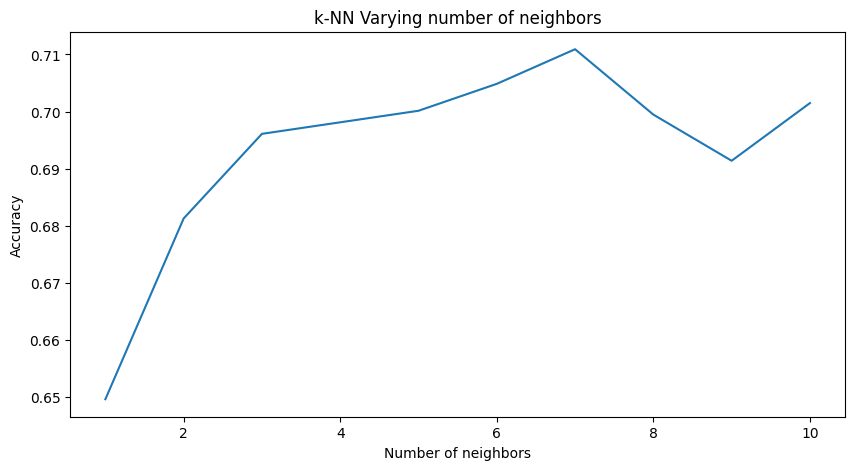

In [ ]:
# Generate a plot using different k values

plt.figure(figsize=(10,5))
plt.title('k-NN Varying number of neighbors')
plt.plot(n_neighbors, test_accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors is 7
Knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Fit the model
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = Knn.predict(x_test)
Knn.score(x_test, y_test)

0.7109164420485176

In [ ]:
accuracy= accuracy_score(y_test, y_pred)
print(accuracy)

0.7109164420485176


In [ ]:
clf_report= classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77       920
         1.0       0.63      0.57      0.60       564

    accuracy                           0.71      1484
   macro avg       0.69      0.68      0.69      1484
weighted avg       0.71      0.71      0.71      1484



In [ ]:
confusion_matrix(y_test,y_pred)

array([[734, 186],
       [243, 321]])

### Hyperparmater tuning of Decision Tree Classifier using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter to fine tune
param_grid = {'max_depth': range(1, 11, 1),
              'min_samples_split': range(1, 10, 1),
              'min_samples_leaf': range(1, 5, 1),
              'criterion': ["entropy", "gini"]}

tree = DecisionTreeClassifier(random_state=24)
# GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, verbose=True)
grid_search.fit(x_train, y_train)
y_pred_grid = grid_search.predict(x_test)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


In [ ]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(classification_report(y_pred_grid, y_test))

best accuracy 0.7077198551082292
DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=9,
                       random_state=24)
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 9}
              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79      1043
         1.0       0.52      0.67      0.59       441

    accuracy                           0.72      1484
   macro avg       0.68      0.71      0.69      1484
weighted avg       0.75      0.72      0.73      1484



### Visualizing the Decision Tree Classifier

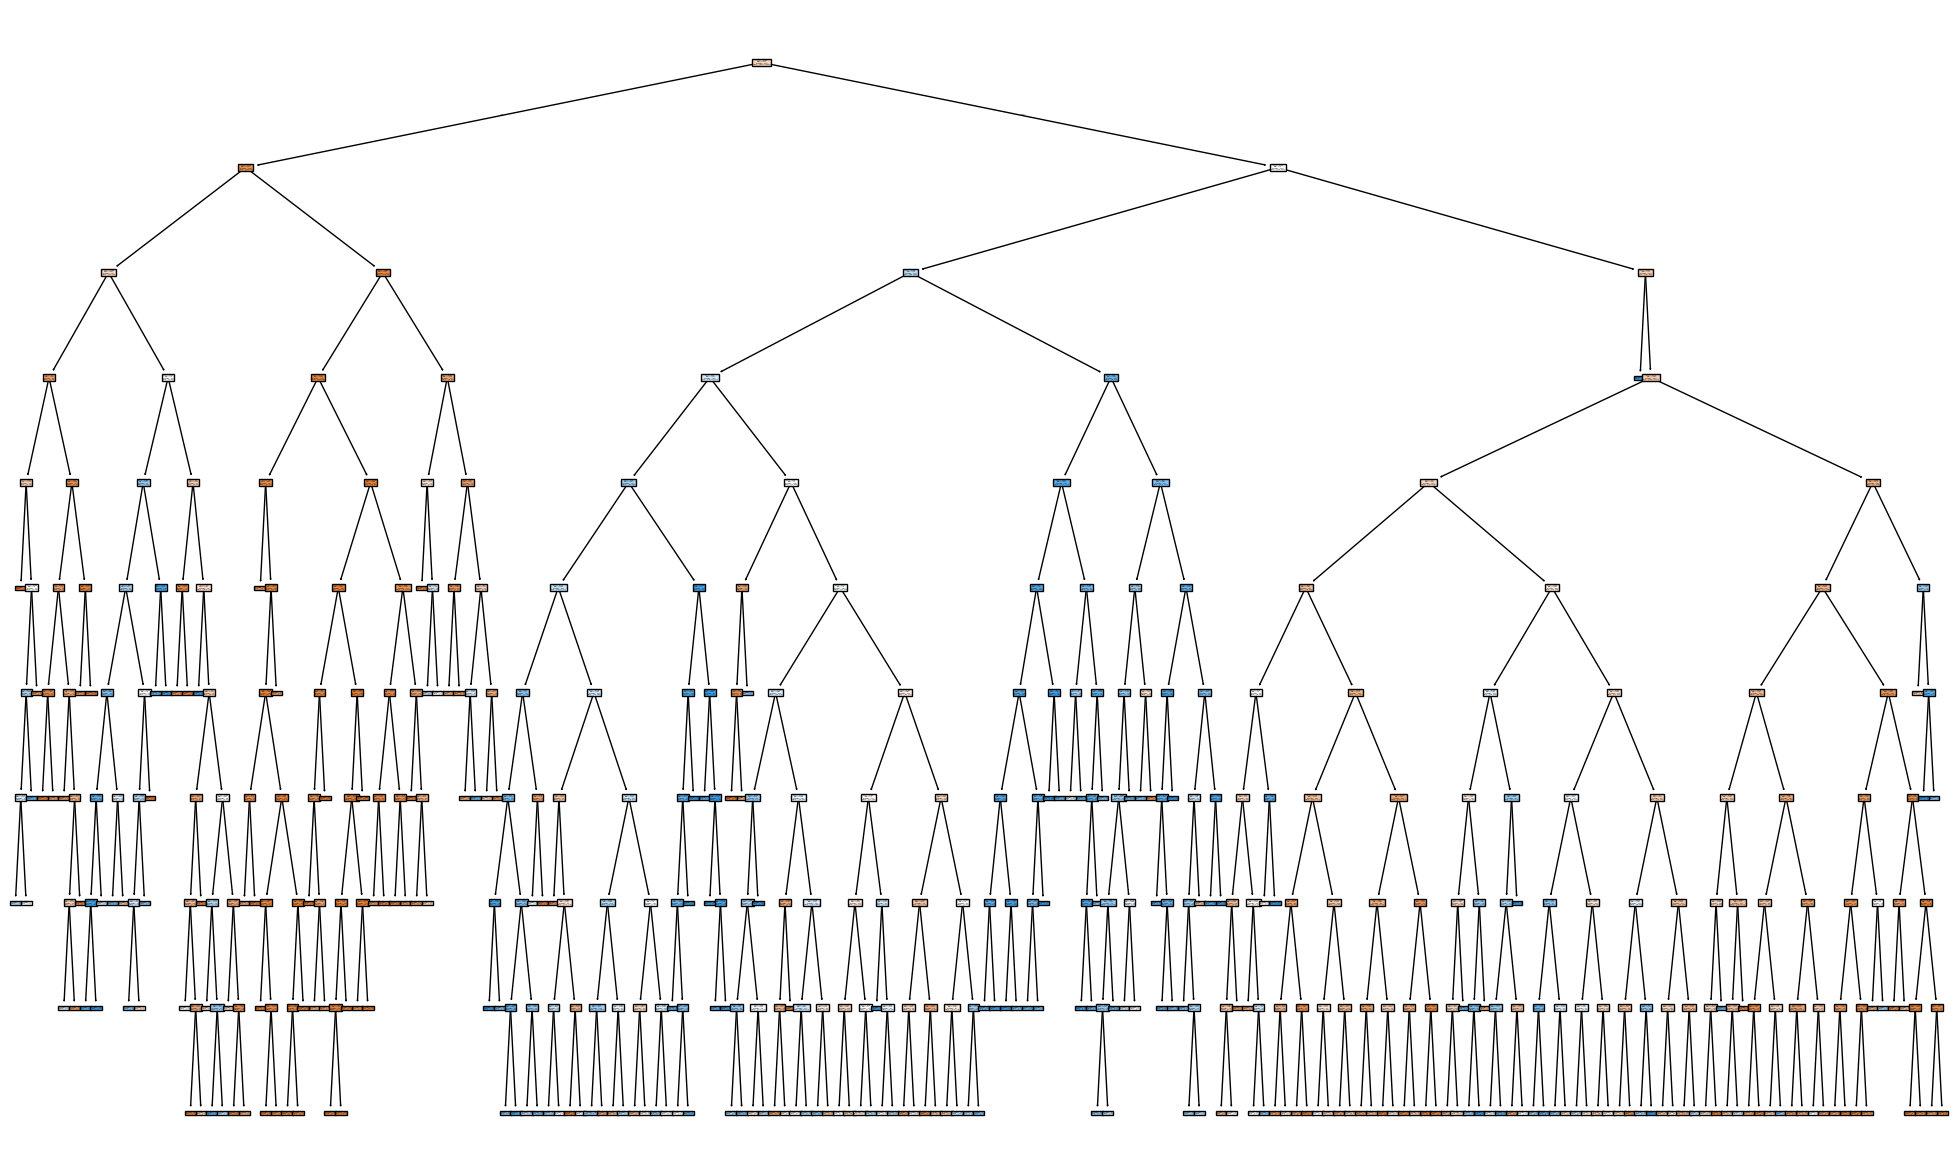

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_clf = grid_search.best_estimator_

plt.figure(figsize=(25, 15))
plot_tree(tree_clf, filled=True)
plt.show()

### Hyperparmater tuning of Random Forest Classifier using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': range(1,10,1),
    'max_leaf_nodes': range(1,10,1),
    'max_features' :['log2','sqrt']}
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(x_train, y_train)
y_pred_grid = grid_search.predict(x_test)

In [ ]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print("Best accuracy : ",grid_search.score(x_test,y_test))
print(classification_report(y_pred_grid, y_test))

RandomForestClassifier(max_depth=7, max_leaf_nodes=9, n_estimators=300)
{'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 300}
Best accuracy :  0.7109164420485176
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       965
         1.0       0.58      0.63      0.60       519

    accuracy                           0.71      1484
   macro avg       0.69      0.69      0.69      1484
weighted avg       0.72      0.71      0.71      1484



### Hyperparmater tuning of Random Forest Classifier using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(x_train, y_train)
y_pred_rand = random_search.predict(x_test)


In [ ]:
print(random_search.best_estimator_)
print(random_search.best_params_)
print("Best accuracy : ",random_search.score(x_test,y_test))
print(classification_report(y_pred_rand, y_test))

RandomForestClassifier(max_depth=7, max_leaf_nodes=5)
{'n_estimators': 100, 'max_leaf_nodes': 5, 'max_features': 'sqrt', 'max_depth': 7}
Best accuracy :  0.6974393530997305
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76       977
         1.0       0.55      0.61      0.58       507

    accuracy                           0.70      1484
   macro avg       0.67      0.68      0.67      1484
weighted avg       0.71      0.70      0.70      1484



### Hyperparmater tuning of SVC using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'C':[1,100,1000],'kernel':['rbf','poly','sigmoid'],'degree':[1,2,3],'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(),param_grid, refit = True, verbose = 2)
grid.fit(x_train,y_train)
y_pred_grid = grid.predict(x_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END .................C=1, degree=1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .................C=1, degree=1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .................C=1, degree=1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .................C=1, degree=1, gamma=1, kernel=rbf; total time=   1.6s
[CV] END .................C=1, degree=1, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ................C=1, degree=1, gamma=1, kernel=poly; total time=   0.8s
[CV] END ................C=1, degree=1, gamma=1, kernel=poly; total time=   0.8s
[CV] END ................C=1, degree=1, gamma=1, kernel=poly; total time=   0.7s
[CV] END ................C=1, degree=1, gamma=1, kernel=poly; total time=   0.8s
[CV] END ................C=1, degree=1, gamma=1, kernel=poly; total time=   0.8s
[CV] END .............C=1, degree=1, gamma=1, kernel=sigmoid; total time=   1.0s
[CV] END .............C=1, degree=1, gamma=1, k

In [ ]:
print(grid.best_params_)
print("Best accuracy : ",grid.score(x_test,y_test))
print(classification_report(y_pred_grid, y_test))

{'C': 100, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
Best accuracy :  0.7088948787061995
              precision    recall  f1-score   support

         0.0       0.83      0.73      0.78      1046
         1.0       0.51      0.65      0.57       438

    accuracy                           0.71      1484
   macro avg       0.67      0.69      0.67      1484
weighted avg       0.74      0.71      0.72      1484



## Conlusion

In this project we have compared different classification models for the dataset FIFA20, they are LogisticRegression, KNeighborsClassifier, SVC,DecisionTreeClassifier, RandomForestClassifier, XGBClassifier here are the following obervations from the models.

Accuracy score of LogisticRegression is 0.68, KNeighborsClassifier is 0.70, SVC is 0.70, DecisionTreeClassifier is 0.71, RandomForestClassifier is 0.71 and XGBClassifier is 0.72

**In summary, based on the accuracy Scores, the XGBClassifier method appear to have produced better-classification compared to the other classification method for the given dataset.**

## Building a predictive system

In [221]:
# Build a predictive model
category =["High Potential", "Low Potential"]
predicted_category =xboost.predict([[20,5,7,4,2],[7,1,2,7,0],[10,2,11,8,5],[18,7,3,7,4],[2,9,3,2,1],[7,10,9,4,0]])
print(predicted_category)
# Iterate through the predicted categories and print the corresponding category label
for prediction in predicted_category:
    print(category[int(prediction)]) # Accessing individual prediction instead of the whole array

[1 0 1 1 1 0]
Low Potential
High Potential
Low Potential
Low Potential
Low Potential
High Potential
